# Project Scope: SPORTS ANALYSIS (CRICKET)

## ASIA CUP 1984-2022
https://www.kaggle.com/datasets/hasibalmuzdadid/asia-cup-cricket-1984-to-2022/data <br>
Comparative Analysis of Teams, Batsman & Bowlers from 1984 till 2022. <br>
According to their previous performance their Future Prediction for the upcoming Season.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Load the datasets
data_asiacup = pd.read_csv("asiacup.csv")
data_batsman = pd.read_csv("batsman data t20i.csv")
data_bowler = pd.read_csv("bowler data t20i.csv")
data_champion = pd.read_csv("champion.csv")

In [50]:
print("Asia Cup Dataset:")
print(data_asiacup.head())
print(data_asiacup.info())

Asia Cup Dataset:
        Team   Opponent Format   Ground  Year  Toss Selection  Run Scored  \
0   Pakistan  Sri Lanka    ODI  Sharjah  1984  Lose   Batting       187.0   
1  Sri Lanka   Pakistan    ODI  Sharjah  1984   Win   Bowling       190.0   
2      India  Sri Lanka    ODI  Sharjah  1984   Win   Bowling        97.0   
3  Sri Lanka      India    ODI  Sharjah  1984  Lose   Batting        96.0   
4      India   Pakistan    ODI  Sharjah  1984   Win   Batting       188.0   

   Wicket Lost  Fours  Sixes  Extras  Run Rate  Avg Bat Strike Rate  \
0          9.0    9.0    3.0    21.0      4.06                52.04   
1          5.0   11.0    1.0    26.0      4.36                68.51   
2          0.0    9.0    0.0    14.0      4.47                60.48   
3         10.0    7.0    0.0     8.0      2.34                25.74   
4          4.0   13.0    3.0    17.0      4.08                60.21   

   Highest Score  Wicket Taken  Given Extras  Highest Individual wicket  \
0           47.0 

In [51]:
print("Batsman Dataset:")
print(data_batsman.head())
print(data_batsman.info())

Batsman Dataset:
        Player Name      Country Time Period  Matches  Played  Not Outs  Runs  \
0          V Kohli         India   2016-2022       10       9         4   429   
1  Mohammad Rizwan      Pakistan   2022-2022        6       6         1   281   
2        RG Sharma         India   2016-2022        9       9         0   271   
3      Babar Hayat     Hong Kong   2016-2022        5       5         0   235   
4   Ibrahim Zadran   Afghanistan   2022-2022        5       5         2   196   

   Highest Score Batting Average  Balls Faced  Strike Rate  Centuries  \
0            122           85.80          325       132.00          1   
1             78           56.20          239       117.57          0   
2             83           30.11          192       141.14          0   
3            122           47.00          160       146.87          1   
4             64           65.33          188       104.25          0   

   Fifties  Ducks  Fours  Sixes  
0        3      1     4

In [52]:
print("Bowler Dataset:")
print(data_bowler.head())
print(data_bowler.info())

Bowler Dataset:
        Player Name      Country Time Period  Matches  Played  Overs  \
0          B Kumar         India   2016-2022        6       6   23.0   
1      Amjad Javed           UAE   2016-2016        7       7   23.0   
2  Al-Amin Hossain    Bangladesh   2016-2016        5       5   16.5   
3  Mohammad Naveed           UAE   2016-2016        7       7   27.4   
4      Rashid Khan   Afghanistan   2016-2022        8       8   31.0   

   Maiden Overs  Runs  Wickets Best Figure  Bowling Average  Economy Rate  \
0             3   123       13         5/4             9.46          5.34   
1             0   169       12        3/25            14.08          7.34   
2             0   134       11        3/25            12.18          7.96   
3             2   145       11        3/14            13.18          5.24   
4             0   202       11        3/22            18.36          6.51   

   Strike Rate  Four Wickets  Five Wickets  
0         10.6             1             1 

In [53]:
print("Champion Dataset:")
print(data_champion.head())
print(data_champion.info())

Champion Dataset:
   Year        Host  No Of Team   Champion  Runner Up Player Of The Series  \
0  1984         UAE           3      India  Sri Lanka      Surinder Khanna   
1  1986   Sri Lanka           3  Sri Lanka   Pakistan     Arjuna Ranatunga   
2  1988  Bangladesh           4      India  Sri Lanka         Navjot Sidhu   
3  1990       India           3      India  Sri Lanka          Not Awarded   
4  1995         UAE           4      India  Sri Lanka         Navjot Sidhu   

  Highest Run Scorer Highest Wicket Taker  
0    Surinder Khanna         Ravi Shastri  
1   Arjuna Ranatunga          Abdul Qadir  
2         Ijaz Ahmed          Arshad Ayub  
3   Arjuna Ranatunga            Kapil Dev  
4   Sachin Tendulkar          Anil Kumble  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  15 non-null     int6

# Comparative Teams Analysis

## 1. Team: Average scoring and wicket-taking per season

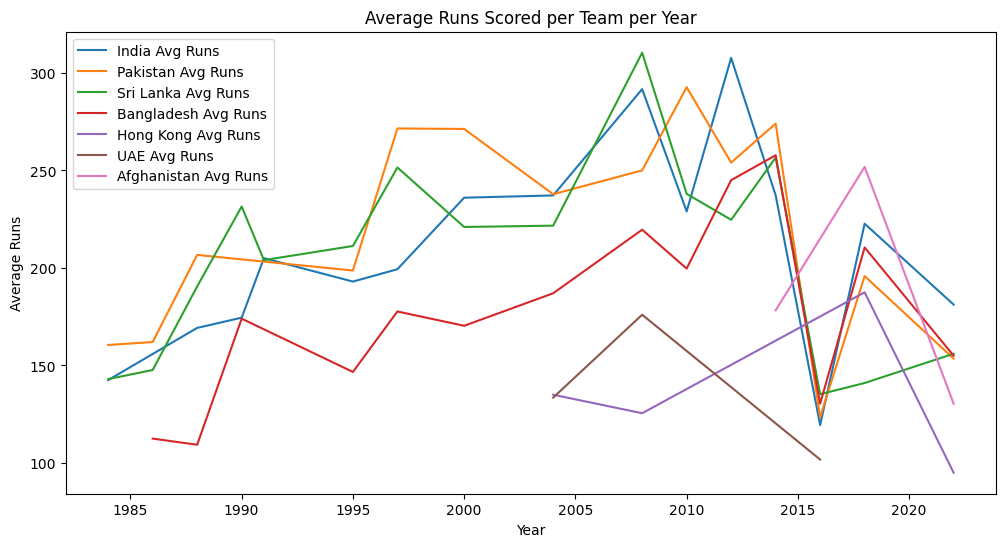

In [54]:
team_stats = data_asiacup.groupby(['Year', 'Team']).agg({'Run Scored': 'mean', 'Wicket Taken': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
for team in team_stats['Team'].unique():
    team_data = team_stats[team_stats['Team'] == team]
    plt.plot(team_data['Year'], team_data['Run Scored'], label=f"{team} Avg Runs")
plt.title("Average Runs Scored per Team per Year")
plt.xlabel("Year")
plt.ylabel("Average Runs")
plt.legend()
plt.show()

## 2. Team results w.r.t toss selection

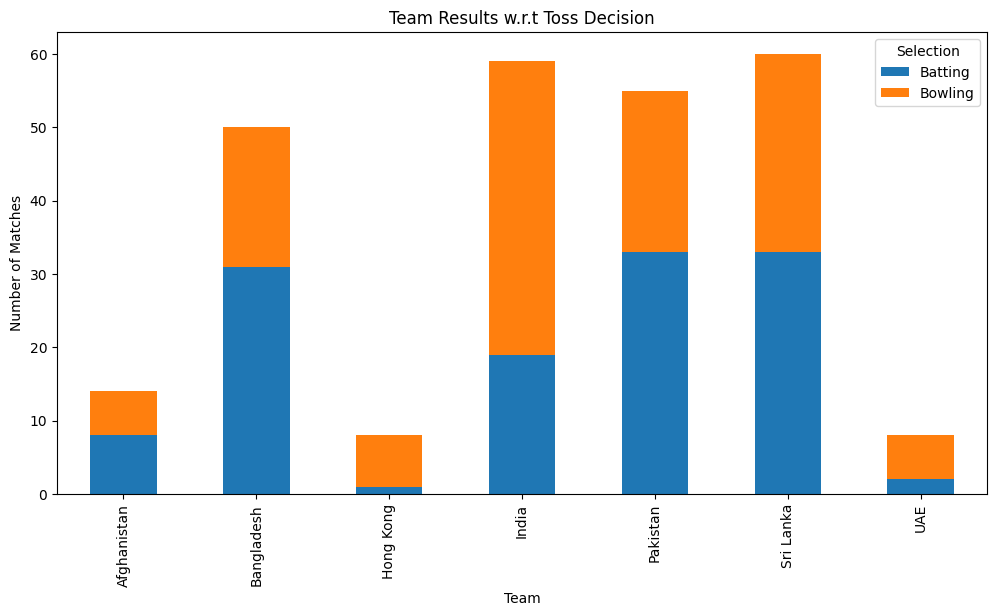

In [55]:
toss_results = data_asiacup.groupby(['Team', 'Selection']).size().unstack()
toss_results.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Team Results w.r.t Toss Decision")
plt.xlabel("Team")
plt.ylabel("Number of Matches")
plt.show()

## 3. Team Run Rate w.r.t Ground (Pitch)

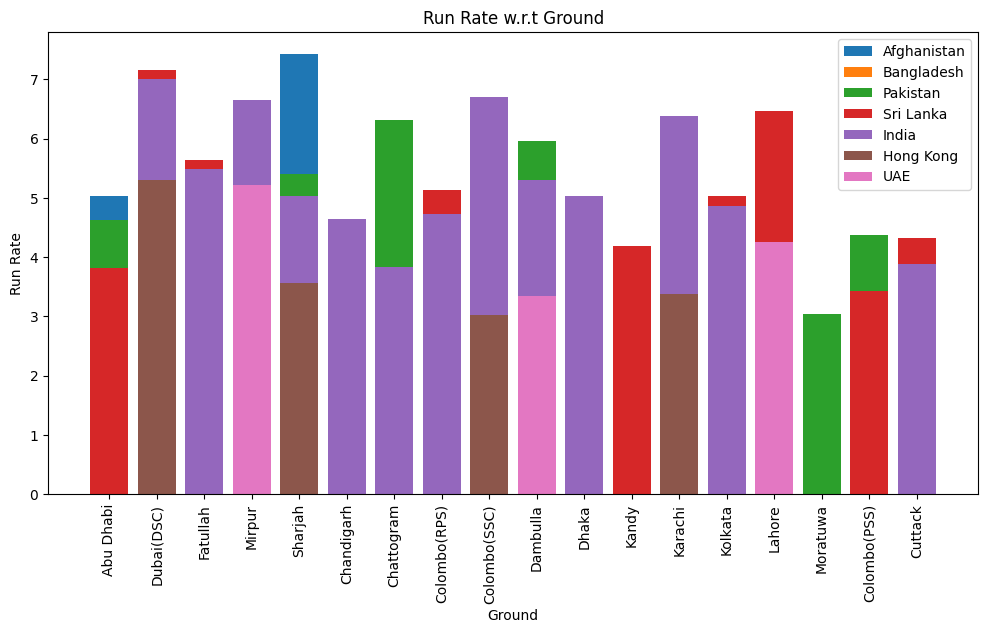

In [56]:
ground_run_rate = data_asiacup.groupby(['Ground', 'Team']).agg({'Run Scored': 'sum', 'Run Rate': 'mean'})
ground_run_rate = ground_run_rate.reset_index()
plt.figure(figsize=(12, 6))
for team in ground_run_rate['Team'].unique():
    team_data = ground_run_rate[ground_run_rate['Team'] == team]
    plt.bar(team_data['Ground'], team_data['Run Rate'], label=team)
plt.title("Run Rate w.r.t Ground")
plt.xlabel("Ground")
plt.xticks(rotation=90)
plt.ylabel("Run Rate")
plt.legend()
plt.show()

## 4. Winning w.r.t Home or Away

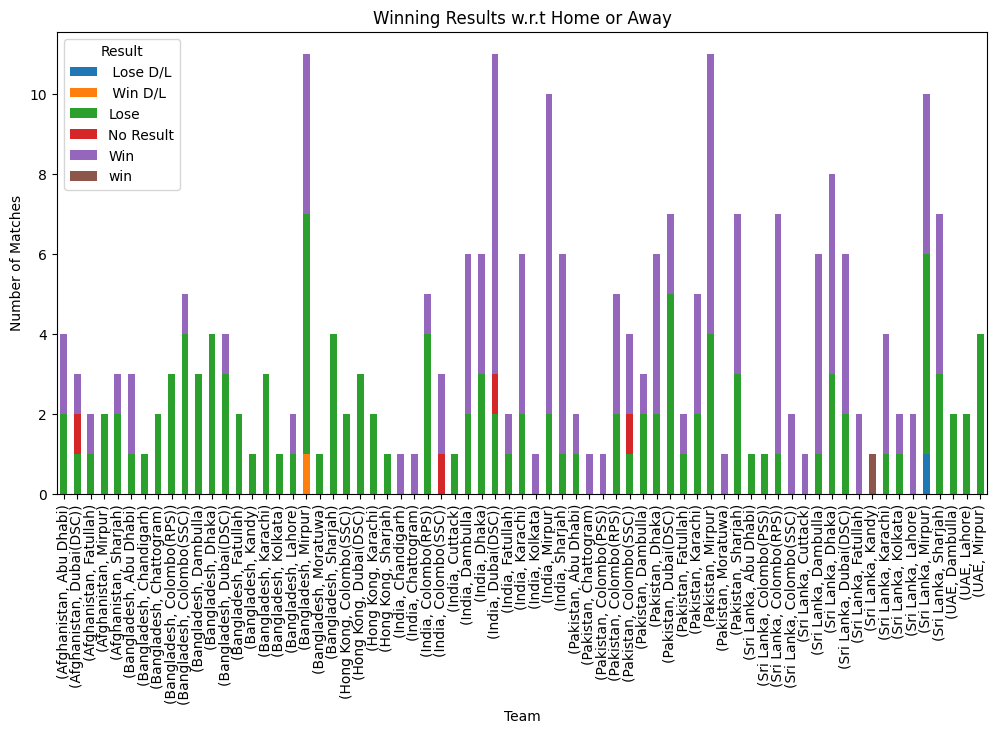

In [57]:
# Assuming there is a HomeOrAway column in the asiacup.csv dataset
home_away_results = data_asiacup.groupby(['Team', 'Ground', 'Result']).size().unstack()
home_away_results.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Winning Results w.r.t Home or Away")
plt.xlabel("Team")
plt.ylabel("Number of Matches")
plt.show()

## 5. Country-wise pattern of performance

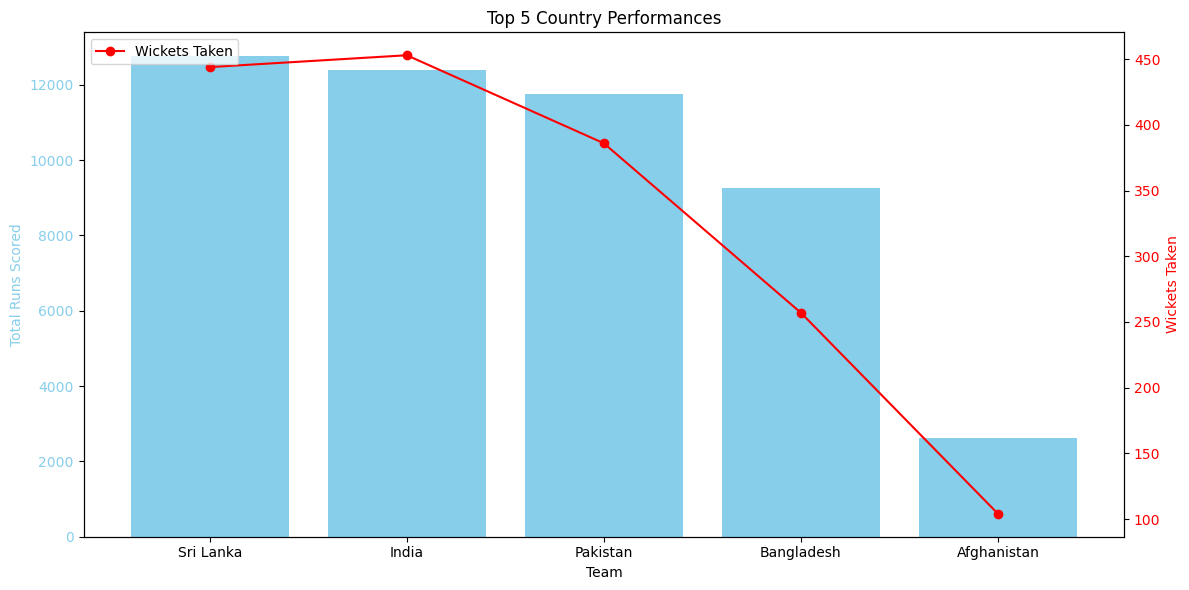

In [58]:
country_performance = data_asiacup.groupby(['Team']).agg({'Run Scored': 'sum', 'Wicket Taken': 'sum'}).reset_index()
country_performance = country_performance.sort_values(by='Run Scored', ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.bar(country_performance['Team'], country_performance['Run Scored'], color='skyblue', label='Total Runs Scored')
ax2.plot(country_performance['Team'], country_performance['Wicket Taken'], color='red', marker='o', label='Wickets Taken')

ax1.set_title("Top 5 Country Performances")
ax1.set_xlabel("Team")
ax1.set_ylabel("Total Runs Scored", color='skyblue')
ax2.set_ylabel("Wickets Taken", color='red')

ax1.tick_params(axis='y', labelcolor='skyblue')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.legend(loc='upper left')
plt.show()

# Batsman Analysis


## 1. Strike rate/ Batting Avg w.r.t Ground

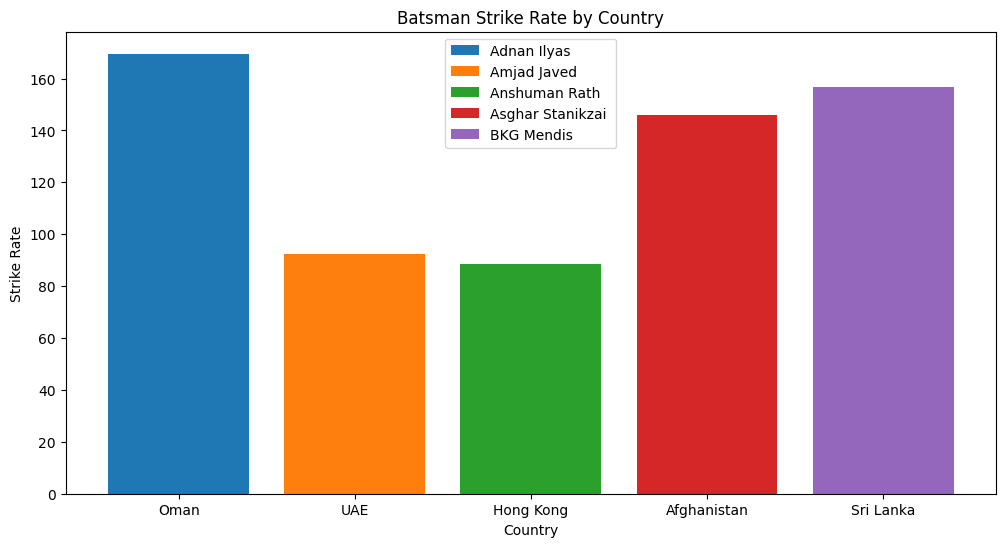

In [59]:
# Convert Strike Rate and Batting Average columns to numeric, handling non-numeric entries
data_batsman['Strike Rate'] = pd.to_numeric(data_batsman['Strike Rate'], errors='coerce')
data_batsman['Batting Average'] = pd.to_numeric(data_batsman['Batting Average'], errors='coerce')

# Group by Player Name and Country, and calculate mean for Strike Rate and Batting Average
batsman_stats = data_batsman.groupby(['Player Name', 'Country']).agg({'Strike Rate': 'mean', 'Batting Average': 'mean'}).reset_index()

# Plotting the analysis
plt.figure(figsize=(12, 6))
for player in batsman_stats['Player Name'].unique()[:5]:
    player_data = batsman_stats[batsman_stats['Player Name'] == player]
    plt.bar(player_data['Country'], player_data['Strike Rate'], label=player)
plt.title("Batsman Strike Rate by Country")
plt.xlabel("Country")
plt.ylabel("Strike Rate")
plt.legend()
plt.show()


## 2. Overall Score of Asia Cup

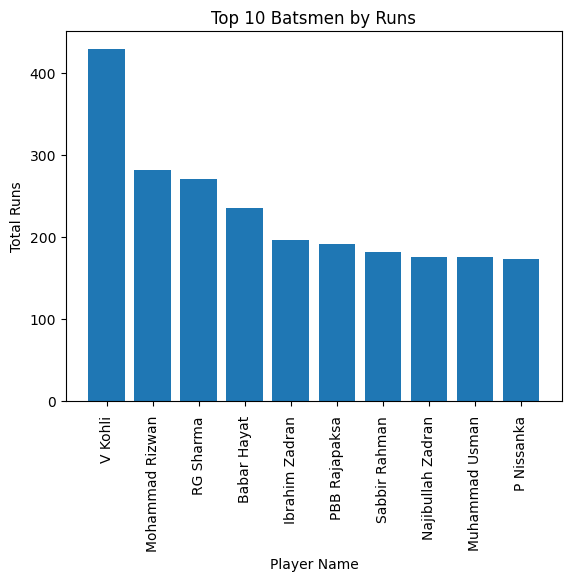

In [60]:
batsman_scores = data_batsman.groupby('Player Name').agg({'Runs': 'sum'}).reset_index()
batsman_scores = batsman_scores.sort_values(by='Runs', ascending=False).head(10)
plt.bar(batsman_scores['Player Name'], batsman_scores['Runs'])
plt.title("Top 10 Batsmen by Runs")
plt.xlabel("Player Name")
plt.ylabel("Total Runs")
plt.xticks(rotation=90)
plt.show()

## 3. Ball faced w.r.t Boundary Hits

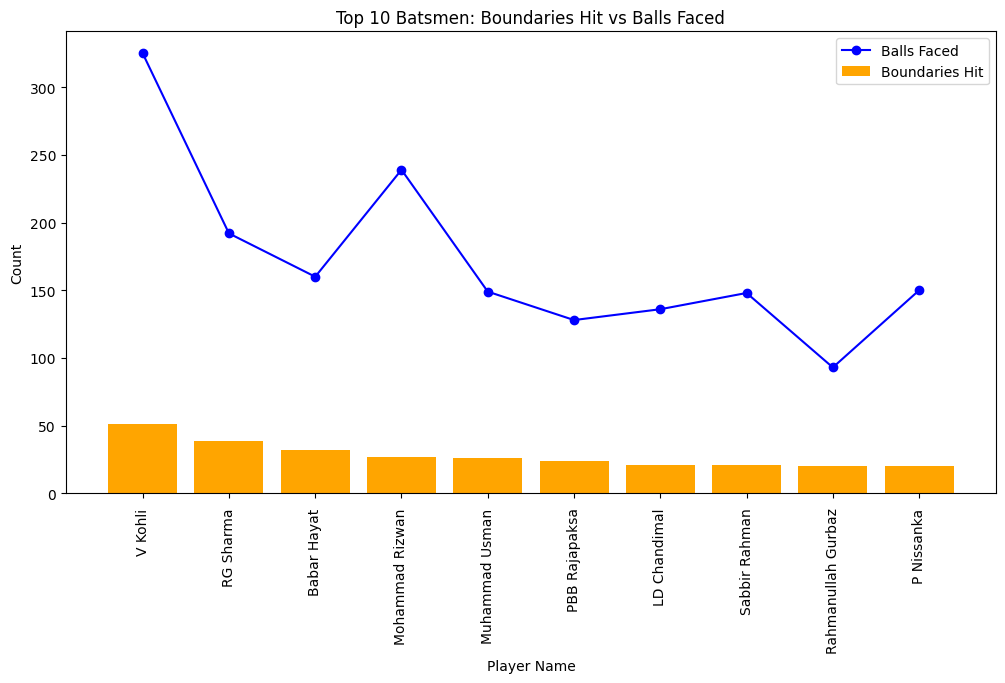

In [61]:
batsman_boundaries = data_batsman.groupby('Player Name').agg({'Balls Faced': 'sum', 'Fours': 'sum', 'Sixes': 'sum'}).reset_index()
batsman_boundaries['Boundaries'] = batsman_boundaries['Fours'] + batsman_boundaries['Sixes']
batsman_boundaries = batsman_boundaries.sort_values(by='Boundaries', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(batsman_boundaries['Player Name'], batsman_boundaries['Boundaries'], color='orange', label='Boundaries Hit')
plt.plot(batsman_boundaries['Player Name'], batsman_boundaries['Balls Faced'], marker='o', color='blue', label='Balls Faced')
plt.title("Top 10 Batsmen: Boundaries Hit vs Balls Faced")
plt.xlabel("Player Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Bowlers Analysis

## Economy Rate w.r.t Ground

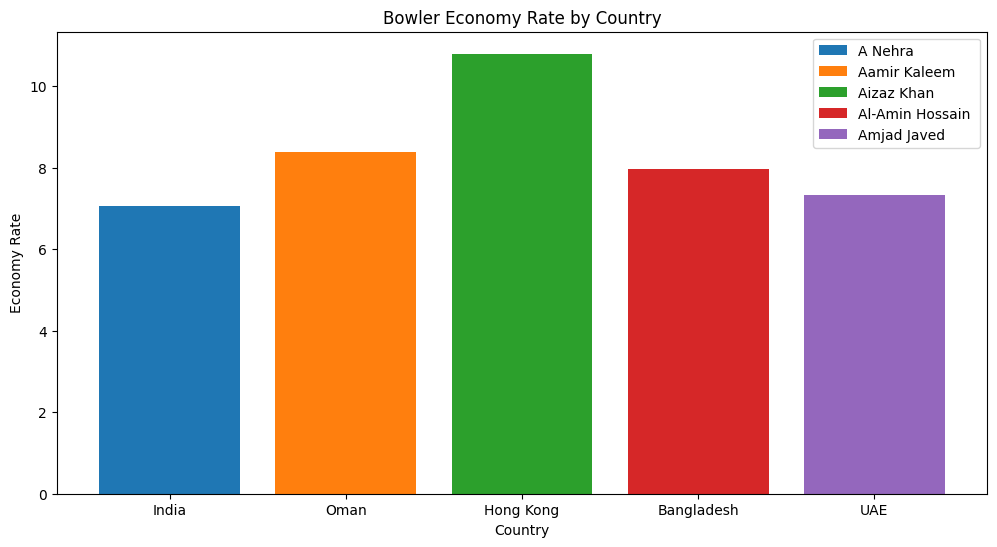

In [62]:
bowler_stats = data_bowler.groupby(['Player Name', 'Country']).agg({'Economy Rate': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
for bowler in bowler_stats['Player Name'].unique()[:5]:
    bowler_data = bowler_stats[bowler_stats['Player Name'] == bowler]
    plt.bar(bowler_data['Country'], bowler_data['Economy Rate'], label=bowler)
plt.title("Bowler Economy Rate by Country")
plt.xlabel("Country")
plt.ylabel("Economy Rate")
plt.legend()
plt.show()

# Champion Prediction Analysis

To predict the next winner of the upcoming Asia Cup season based on the past performance of teams, we can apply a simple regression model to estimate the team's performance (e.g., based on total runs scored, wickets taken, and other factors). <br>
By ranking the teams based on their past performances and analyzing trends, we can predict the likely winners.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

* **Feature Creation:** A new column Performance is created, combining Run Scored and Wicket Taken to represent overall team performance. This is used as the target variable in prediction. (sum of runs and wickets)

In [64]:
team_performance = data_asiacup.groupby(['Year', 'Team']).agg({'Run Scored': 'sum', 'Wicket Taken': 'sum'}).reset_index()

# We will create a new column representing 'Performance' by combining runs and wickets (weighted sum)
team_performance['Performance'] = team_performance['Run Scored'] + team_performance['Wicket Taken']

# Prepare the data for modeling
X = team_performance[['Year', 'Run Scored', 'Wicket Taken']]  # Features: Year, Runs, Wickets
y = team_performance['Performance']  # Target: Performance

* **Linear Regression Model:** A linear regression model is trained using past performance data (Run Scored and Wicket Taken) to predict future performance. So, now Split the data into training and testing sets

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict performance for the next season (you can use the last year or set a new year for prediction)
next_year = team_performance['Year'].max() + 1  # Predict for the next year
teams_last_year = team_performance[team_performance['Year'] == team_performance['Year'].max()]
X_next = teams_last_year[['Year', 'Run Scored', 'Wicket Taken']].copy()
X_next['Year'] = next_year  # Set the year to next season for prediction

* **Prediction for Next Season:** We predict the next season's performance by taking the most recent data (last year) and adjusting the year for the prediction.

In [66]:
# Predict performance for next season
predictions = model.predict(X_next)

# Add predictions to the teams' data
teams_last_year['Predicted Performance'] = predictions

<ipython-input-66-dd07eebeb1f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_last_year['Predicted Performance'] = predictions


* **Sorting and Plotting:** After prediction, teams are sorted by their predicted performance, and the top 10 teams with the highest predicted performance are visualized. (higher performance = higher chance of winning)

In [ ]:
sorted_teams = teams_last_year.sort_values(by='Predicted Performance', ascending=False).head(10)

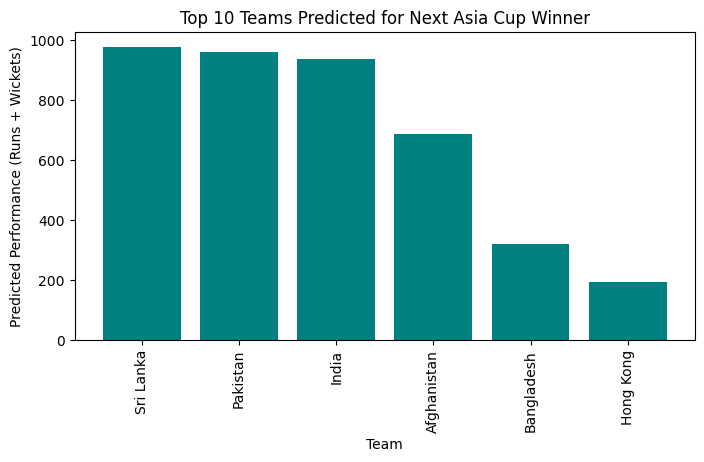

Top 10 Predicted Teams for Next Asia Cup:
           Team  Predicted Performance
68    Sri Lanka                  979.0
67     Pakistan                  960.0
66        India                  938.0
63  Afghanistan                  686.0
64   Bangladesh                  321.0
65    Hong Kong                  194.0


In [69]:
# Plot the top 10 teams with the highest predicted performance
plt.figure(figsize=(8, 4))
plt.bar(sorted_teams['Team'], sorted_teams['Predicted Performance'], color='teal')
plt.title("Top 10 Teams Predicted for Next Asia Cup Winner")
plt.xlabel("Team")
plt.ylabel("Predicted Performance (Runs + Wickets)")
plt.xticks(rotation=90)
plt.show()

# Display the top 10 predicted teams
print("Top 10 Predicted Teams for Next Asia Cup:")
print(sorted_teams[['Team', 'Predicted Performance']])